In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import matplotlib as mpl

In [2]:
iris = pd.read_csv("./Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]
print(X.sample(5))
# y.sample(5)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
121  122            5.6           2.8            4.9
30    31            4.8           3.1            1.6
125  126            7.2           3.2            6.0
110  111            6.5           3.2            5.1
15    16            5.7           4.4            1.5


In [4]:
X.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns )

X_scaled.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,-1.720542,-0.900681,1.032057,-1.341272
1,-1.697448,-1.143017,-0.124958,-1.341272
2,-1.674353,-1.385353,0.337848,-1.398138
3,-1.651258,-1.506521,0.106445,-1.284407
4,-1.628164,-1.021849,1.263460,-1.341272


In [6]:
from sklearn.cluster import KMeans

nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

In [7]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled,y_cluster_kmeans)
score

0.42560414986156675

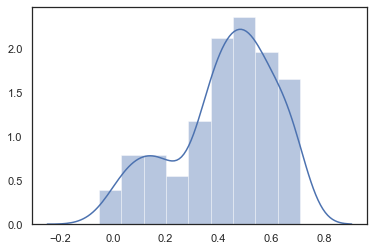

In [8]:
scores = metrics.silhouette_samples(X_scaled,y_cluster_kmeans )
sns.distplot(scores)

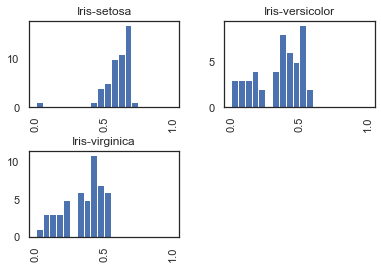

In [9]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = iris['Species']
df_scores.hist(by='Species', column='SilhouetteScore',range=(0,1.0),bins=20);

In [10]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y,y_cluster_kmeans)
score

0.694647633734363

In [11]:
from sklearn.decomposition import PCA
ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed )
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
# X_pca.sample(5)
X_pca.describe()

,PC1,PC2
count,1.500000e+02,1.500000e+02
mean,-5.033011e-17,2.590520e-17
std,1.682626e+00,9.597244e-01
min,-2.733545e+00,-2.649299e+00
25%,-1.966230e+00,-6.083805e-01
50%,4.236274e-01,-6.322252e-03
75%,1.440119e+00,6.126146e-01
max,3.069312e+00,2.720174e+00


In [12]:
y_id_array = pd.Categorical(iris['Species']).codes
y_id_array
df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans #prediction
df_plot['SpeciesId'] = y_id_array #reference
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
76,1.135535,-0.005011,0,1
40,-2.086025,0.405501,1,0
33,-2.295770,2.128231,1,0
107,2.277843,0.521274,0,2
31,-1.816734,0.405682,1,0


In [15]:

def plotData(df,groupby):
    "make a scatterplot of the first two principal components of the data colored by the groupby"
    
    fig, ax = plt.subplots(figsize=(7,7))
    
    cmap = mpl.cm.get_cmap('prism')
    
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax=ax,
                    kind='scatter',x='PC1',y='PC2',
                    color=cmap(i/(nclusters-1)),
                    label = "%s %i" % (groupby,i),
                    s=30)
    ax.grid()
    ax.axhline(0,color='black')
    ax.axvline(1,color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

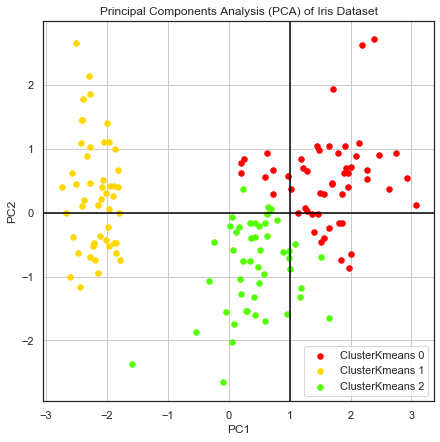

In [14]:
plotData(df_plot, 'ClusterKmeans')

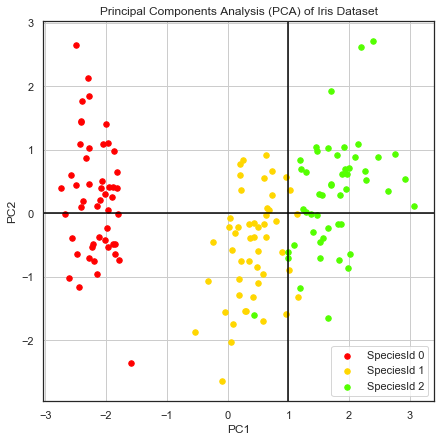

In [16]:
plotData(df_plot, 'SpeciesId')

In [19]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

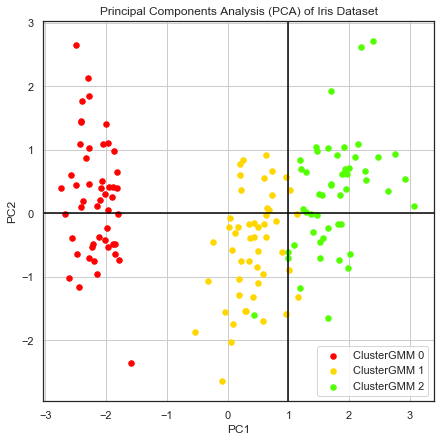

In [20]:
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [17]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y,y_cluster_kmeans)
score

0.694647633734363

In [21]:
score = adjusted_rand_score(y,y_cluster_gmm)
score

1.0